# Evaluación de Desempeño VA2019-01

* A continuacion se procede a formular un modelo de clasificacion supervisada y unmodelo de clasificación no supervisado, haciendo uso del dataset "mushrooms.csv"


* El objetivo de este modelo es predecir cuando un "mushroom" (hongo) es comestible, o como el dataset lo clasifica:
    * e = edible "COMESTIBLE"
    * p = poisonous "VENENOSO"
    
    
* Se utilizara distintas tecnicas como Regresiones Logisticas con sus respecivas Metricas y tecnicas de Machine Learning como lo son las Redes Neuronales

In [1]:
# Paquetes necesarios para la manipulación de los datos
import pandas as pd
from sklearn.metrics import auc
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split    
from sklearn.metrics import precision_score, mean_squared_error, confusion_matrix, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import warnings
warnings.filterwarnings('ignore')

In [2]:
hongos = pd.read_csv("mushrooms.csv", sep=",")

In [3]:
hongos.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
#Nombres de las características de éste dataset
hongos.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [5]:
hongos.shape

(8124, 23)

In [7]:
#Mostrar las clases del dataset
set(hongos["class"])

{'e', 'p'}

In [8]:
#Seleccionar el scaler
scaler = MinMaxScaler()

In [9]:
X_hongos = hongos.drop("class", axis=1)
Y_hongos = hongos["class"]

In [10]:
X_hongos.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


## Ahora, se escalan los datos X_hongos.

In [13]:
Y_hongos.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

In [15]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in hongos.columns:
    hongos[column] = labelencoder.fit_transform(hongos[column])

In [17]:
hongos.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [18]:
X_hongos = hongos.drop("class", axis=1)
Y_hongos = hongos["class"]

In [19]:
X_hongos.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [20]:
Y_hongos.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64

####  Convirtiendo en Dataframe 

In [21]:
X_hongos_scaled = pd.DataFrame(X_hongos, columns = X_hongos.columns)

In [22]:
X_hongos_scaled.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


#### Se verifica que el Shape de los datos X_hongos_scaled y Y_hongos sean iguales

In [23]:
if X_hongos_scaled.shape[0] == Y_hongos.shape[0]:
    print("El número de filas coinciden, ¡Es correcto!")

El número de filas coinciden, ¡Es correcto!


#### Division de los datos para el entrenamiento de la Red Neuronal con un test_size de 0.20

In [25]:
X_train_hongos, X_test_hongos, y_train_hongos, y_test_hongos = train_test_split(X_hongos_scaled, Y_hongos, test_size=0.20)

## Regresión Logística

In [26]:
#Regresión Logística con sklearn
regresion_logistica = linear_model.LogisticRegression()

### Ajustando el Modelo a la Regresion Logistica

In [27]:
regresion_logistica.fit(X_train_hongos, y_train_hongos)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Metricas de Precisión en Entrenamiento y Pruebas

In [29]:
y_pred_train = regresion_logistica.predict(X_train_hongos)
efectividad_entrenamiento = accuracy_score(y_train_hongos, y_pred_train)
print("Precisión de entrenamiento = " + str(efectividad_entrenamiento))

Precisión de entrenamiento = 0.952146484074473


In [30]:
y_pred_test = regresion_logistica.predict(X_test_hongos)
efectividad_pruebas = accuracy_score(y_test_hongos, y_pred_test)
print("Precisión de pruebas: " + str(efectividad_pruebas))

Precisión de pruebas: 0.9366153846153846


* Según lo observado anteriormente se puede concluir que el modelo es un buen clasificador y se encuentra bien ajustado sobre los datos

* La precision del Entrenamiento del Modelo es de 0.95 aprox
* La precision de pruebas del Modelo es de 0.93 aprox


### Matriz de Confusion

In [32]:
matriz_confusion = confusion_matrix(y_test_hongos, y_pred_test, labels=[1, 0])

# Para mostrar de mejor forma la matriz
table = pd.DataFrame(matriz_confusion)
table.columns = [1, 0]
table.index = [1, 0]
print(table)

     1    0
1  721   61
0   42  801


* Los Falsos Positivos(FP), Falsos Negativos (FN), Verdaderos Positivos (VP) y Verdaderos Negativos (VN), que adquieren sentido cuando se trata de un problema de clasificación binaria.

In [33]:
VN, FP, FN, VP = matriz_confusion.ravel()

### Precision del Modelo

$$P = \frac{VerdaderoPositivo}{VerdaderoPositivo + FalsoPositivo}$$

* Probabilidad de que el modelo no marque como positivo, una muestra negativo.

In [34]:
P = VP/(VP+FP)
print("La precisión del modelo es: " + str(P))

La precisión del modelo es: 0.9292343387470998


### Sensibilidad del Modelo

$$R = \frac{VerdaderoPositivo}{VerdaderoPositivo + FalsoNegativo}$$

* Capacidad del modelo de encontrar los valores positivos.

In [37]:
R = VP/(VP+FN)
print("La sensibilidad del modelo es: " + str(R))

La sensibilidad del modelo es: 0.9501779359430605


### Especifidad del Modelo

$$E = \frac{VerdaderoNegativo}{VerdaderoNegativo + FalsoPositivo}$$

* Capacidad del modelo de encontrar elementos negativos.

### F1 Score:



$$F1\_score = \frac{2 * P * R}{P + R}$$

* Promedio entre precisión y sensibilidad, que da igual importancia a ambos valores.

In [38]:
F = (2*P*R)/(P+R)
print("El F1-Score del modelo es: " + str(F))

El F1-Score del modelo es: 0.9395894428152494


### Area Bajo la Curva

In [39]:
# Calculo del valor x para el caso de la regresión logistica
y_score = regresion_logistica.decision_function(X_test_hongos)

In [44]:
## 1 = p venenosa
## 0 = e comestible

fpr, tpr, thresholds = roc_curve(y_test_hongos, y_score, pos_label=1)
print("Los thresholds son: \n")
print(thresholds)
print("Los valores de sensibilidad son: \n")
print(tpr) # imprimir la sensibilidad
print("Los valores de especificidad son: \n")
print(1-fpr) # imprimir la especificidad

Los thresholds son: 

[ 10.34392004   5.59006783   5.57809007   5.14286617   5.106693
   4.90932181   4.86303718   4.6932797    4.61897277   4.61321836
   4.60950004   4.60280755   4.59481278   3.46111878   3.45479264
   3.30082633   3.30043887   2.62582942   2.62162122   2.41298412
   2.39804783   2.33195401   2.33155795   2.30834071   2.3031799
   2.22905149   2.22424101   2.0495918    2.04855597   2.03421461
   2.00066762   1.94925329   1.94314227   1.94018248   1.93366954
   1.88293298   1.87112899   1.84743096   1.834365     1.83297571
   1.81967773   1.81491417   1.81020501   1.76096264   1.73575154
   1.71519139   1.70479131   1.65723242   1.65585123   1.61588684
   1.612287     1.60806817   1.58561582   1.55275599   1.47324058
   1.47214277   1.44594932   1.4262479    1.42287611   1.39822038
   1.37393604   1.37110836   1.34726486   1.30500751   1.30370063
   1.26264945   1.24796032   1.19861351   1.16825219   1.14959353
   1.13987413   1.10183484   1.08842287   1.08372708   1.

### Finalmente, se muestra la curva ROC y la comparación con la peor configuración posible existente, con matplotlib.

Text(0.5,1,'AUC')

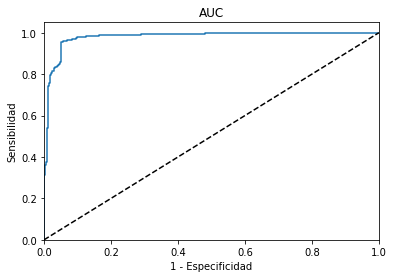

In [45]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Especificidad')
plt.ylabel('Sensibilidad')
plt.title('AUC')

### Ahora, el objetivo es calcular el AUC de la curva ROC, área que representa una medida de qué tan bueno o malo es el modelo estudiado. Entre mayor sea(cercano a 1), mucho mejor será el modelo.

In [46]:
print("El área bajo la curva del modelo es: ")
auc(fpr, tpr)

El área bajo la curva del modelo es: 


0.980502892786389

### Evaluación de modelos de regresión.

* Implemente, una máquina de soporte vectorial (SVM) y utilícela sobre el mismo dataset. 

* Compare los resultados mediante el área bajo la curva entre el modelo SVM y la regresión logística implementada en el notebook.

* Recuerde que debe utilizar los mismos conjuntos de datos para ambos modelos(recuerde que split entrega la distribución respetando la proporción que escoja el usuario, pero de forma aleatoria con los datos).

### SVM

In [87]:
### ENTRENAMIENTO

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_hongos, Y_hongos, test_size = 0.20)

In [88]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=8, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [89]:
y_pred = svclassifier.predict(X_test)

In [90]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[839   0]
 [  0 786]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       839
          1       1.00      1.00      1.00       786

avg / total       1.00      1.00      1.00      1625



### Resultados

Según la matriz anterior, se puede observar que el modelo al utilizar una maquina SVM obtiene una precision muy alta, lo que permitirá establecer si los hongos son comestibles o no con mayor facilidad. 

## Red Neuronal

In [47]:
#Importar librerías
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


### Entrenamiento

In [81]:
x_train, x_test, y_train, y_test = train_test_split(X_hongos,Y_hongos,test_size = 0.2,random_state=1)

In [84]:
## VERBOSE = 0 EVITA QUE SE IMPRIMA DURANTE CADA EPOCH

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library

def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_hongos.shape[1]))
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 150,batch_size=10,verbose=0) 
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Accuracy mean: 1.0
Accuracy variance: 0.0


* #### Se observar que la efectividad del modelo tiene un promedio de: 1.0 aprox
* #### Se observa que la varianza entre la efectividad del modelo es de 0 aprox

### Visualizacion de los Resultados.

* A continuacion se pone a ejecutar el modelo y mostrar graficamente sus resultados.


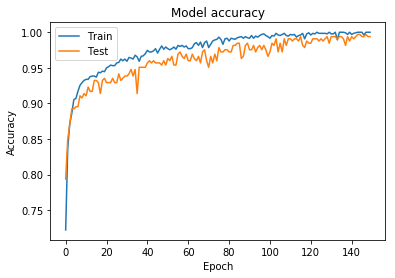

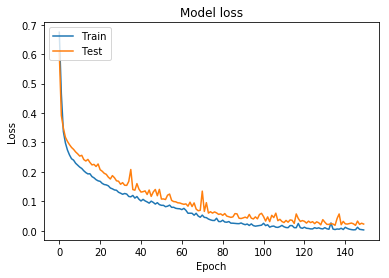

In [85]:
## VERBOSE = 0 EVITA QUE SE IMPRIMA DURANTE CADA EPOCH

history = classifier.fit(x_test, y_test, validation_split=0.20, epochs=150, batch_size=10, verbose=0)

# Plot training & validation accuracy values

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Conclusiones

* #### Model Accuracy: Esta grafica nos permite observar que la efectividad el modelo es muy acertada, ya que la tendencia es que el entrenamiento y la validacion (test) tiendan a obtener resultados muy similares.
    
* #### Model Loss: Esta grafica nos permite observar que la perdida de los datos tiende cada vez a reducirse, ademas se puede evidenciar que las pruebas de entrenamiento y las de efectividad (test) tienden a comportarse de forma similar

* Las predicciones de cada modelo dependen de los parametros establecidos para estos y de la calidad y cantidad de la informacion.

* Al observar que los modelos elaborados anteriormente durante este notebook llegan al mismo resultado pero de distintas formas, se puede concluir que el modelo construido consta de informacion necesaria para su procesamiento y predicciones futuras.